# Inżynieria cech

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import math
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

from category_encoders import OneHotEncoder

Wczytanie danych

In [2]:
grades_df=pd.read_csv('https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/school_grades_dataset.csv')
grades_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
grades_changed=grades_df.copy()
grades_changed

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Jak widać wiele kolumn zawiera wartości inne niż takie będące liczbowymi. Stąd by przeprowadzić lepsze modelowanie, postanowiliśmy zamienić je na wartości numeryczne.

In [4]:
def SchoolName(school):
  return{
      "GP":0,
      "MS":1
  }[school]

def FemaleMen(gender):
  return{
      "F": 0,
      "M":1
  }[gender]

def Address(address):
  return{
      "U":0,
      "R":1
  }[address]

def FamSize(family):
  return{
      "LE3":0,
      "GT3":1
  }[family]

def Pstatus(parents):
  return{
      "A":0,
      "T":1
  }[parents]


def SchoolSup(support):
  return{
      "yes":1,
      "no":0
  }[support]

def FamilySup(Fsupport):
  return{
      "yes":1,
      "no":0
  }[Fsupport]

def Paid(paid):
  return{
      "yes":1,
      "no":0
  }[paid] 

def Activities(activ):
  return{
      "yes":1,
      "no":0
  }[activ]

def Nursery(nurs):
  return{
      "yes":1,
      "no":0
  }[nurs]

def Higher(high):
  return{
      "yes":1,
      "no":0
  }[high]

def Internet(net):
  return{
      "yes":1,
      "no":0
  }[net]

def Romantic(rom):
  return{
      "yes":1,
      "no":0
  }[rom]

In [5]:
grades_changed.school=grades_changed.school.apply(SchoolName)
grades_changed.sex=grades_changed.sex.apply(FemaleMen)
grades_changed.address=grades_changed.address.apply(Address)
grades_changed.famsize=grades_changed.famsize.apply(FamSize)
grades_changed.Pstatus=grades_changed.Pstatus.apply(Pstatus)
grades_changed.schoolsup=grades_changed.schoolsup.apply(SchoolSup)
grades_changed.famsup=grades_changed.famsup.apply(FamilySup)
grades_changed.paid=grades_changed.paid.apply(Paid)
grades_changed.activities=grades_changed.activities.apply(Activities)
grades_changed.nursery=grades_changed.nursery.apply(Nursery)
grades_changed.higher=grades_changed.higher.apply(Higher)
grades_changed.internet=grades_changed.internet.apply(Internet)
grades_changed.romantic=grades_changed.romantic.apply(Romantic)
grades_changed.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,0,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,1,1,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,0,1,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,1,1,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,1,1,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Teraz jeszcze zamienimy pozostałe cztery kolumny za pomocą One-Hot encoding.

In [6]:
#Mjob, Fjob, reason, guardian
one_hot_enc_0=OneHotEncoder(use_cat_names=True).fit_transform(grades_changed.Mjob)
one_hot_enc_1=OneHotEncoder(use_cat_names=True).fit_transform(grades_changed.Fjob)
one_hot_enc_2=OneHotEncoder(use_cat_names=True).fit_transform(grades_changed.reason)
one_hot_enc_3=OneHotEncoder(use_cat_names=True).fit_transform(grades_changed.guardian)

In [7]:
grades_changed= grades_changed.join(one_hot_enc_0)
grades_changed= grades_changed.join(one_hot_enc_1)
grades_changed= grades_changed.join(one_hot_enc_2)
grades_changed= grades_changed.join(one_hot_enc_3)
del grades_changed['Mjob']
del grades_changed['Fjob']
del grades_changed['reason']
del grades_changed['guardian']
grades_changed

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_services,Fjob_health,Fjob_at_home,reason_course,reason_other,reason_home,reason_reputation,guardian_mother,guardian_father,guardian_other
0,0,0,18,0,1,0,4,4,2,2,...,0,0,0,1,0,0,0,1,0,0
1,0,0,17,0,1,1,1,1,1,2,...,0,0,0,1,0,0,0,0,1,0
2,0,0,15,0,0,1,1,1,1,2,...,0,0,0,0,1,0,0,1,0,0
3,0,0,15,0,1,1,4,2,1,3,...,1,0,0,0,0,1,0,1,0,0
4,0,0,16,0,1,1,3,3,1,2,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,1,1,2,3,1,3,...,0,0,0,1,0,0,0,1,0,0
645,1,0,18,0,0,1,3,1,1,2,...,1,0,0,1,0,0,0,1,0,0
646,1,0,18,0,1,1,1,1,2,2,...,0,0,0,1,0,0,0,1,0,0
647,1,1,17,0,0,1,3,1,2,1,...,1,0,0,1,0,0,0,1,0,0


W naszych danych podano wyniki śródsemestralnych egzaminów dla poszczególnych studentów ("G1", "G2"), które są bardzo zbliżone do wyników ostatecznych ("G3"). Stąd zdecydowaliśmy się przygotować modele na dwóch rodzajach danych - tych zawierających kolumny "G1" oraz "G2" oraz takich, które ich nie zawierają.

In [8]:
X_without_exams = grades_changed.drop(["G1", "G2", "G3"], axis=1)
X_with_exams = grades_changed.drop("G3", axis=1)
Y = grades_changed.G3
total_results_with = {}
total_results_without = {}

# Przykładowe modele
Na nasz problem można spojrzeć zarówno jako na problem klasyfikacji, jak i regresji, zatem przygotujemy modele dla obu tych rodzajów. Z powodu małej ilości danych do testowania modeli użyjemy metody cross-validation.

## Modele klasyfikacyjne

### Logistyczna regresja
Na początek sprawdźmy, jak sprawdzi się prosta regresja logistyczna na naszym zbiorze.

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logreg = LogisticRegression()
standard_with = cross_validate(logreg, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

In [10]:
standard_without = cross_validate(logreg, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

Spróbujmy wygenerować nowe wielomianowe cechy i zastosujemy je dla kolumn liczbowych.

In [11]:
not_categorical = grades_df.select_dtypes(include=np.number).columns.tolist()
not_categorical.remove('G3')
not_categorical_mod = not_categorical.copy()
not_categorical_mod.remove('G2')
not_categorical_mod.remove('G1')

In [12]:
from sklearn.compose import ColumnTransformer
poly = ColumnTransformer([
                          ('Poly', PolynomialFeatures(2, include_bias=False), not_categorical)
                          ],
                         remainder='passthrough'
                         )
logreg_modified = Pipeline([
                            ("Poly", poly),
                            ("Logreg", logreg)
])
poly_with = cross_validate(logreg_modified, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

Teraz robimy to samo, tylko dla danych bez wyników egzaminu.

In [13]:
poly = ColumnTransformer([
                          ('Poly', PolynomialFeatures(2, include_bias=False), not_categorical_mod)
                          ],
                         remainder='passthrough'
                         )
logreg_modified = Pipeline([
                            ("Poly", poly),
                            ("Logreg", logreg)
])

poly_without= cross_validate(logreg_modified, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

Wygenerowanie wielomianowych feature'ów zapewniło nam lepsze osiągi w przypadku, gdy mieliśmy dane na temat poprzednich egzaminów.

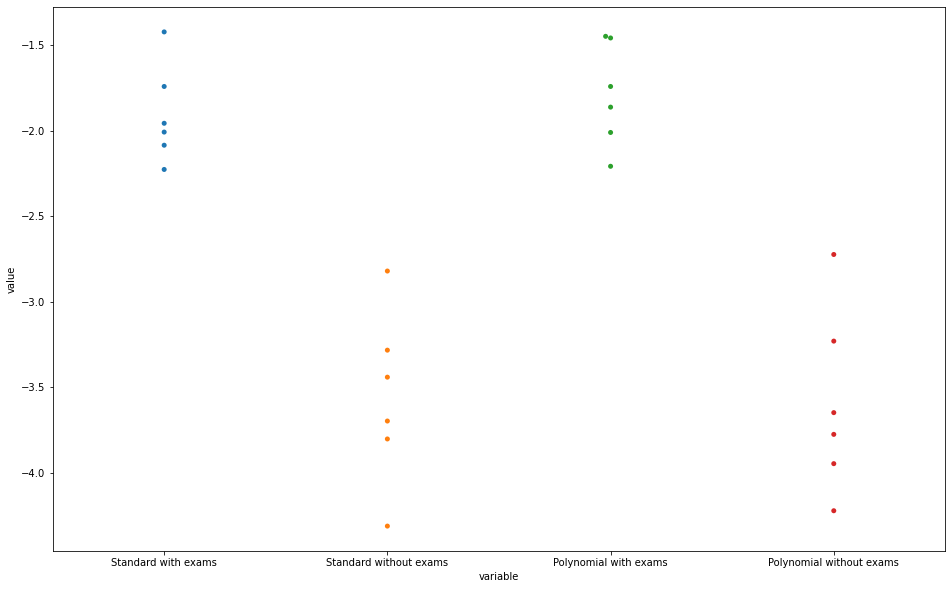

In [14]:
results_df = pd.DataFrame({'Standard with exams': standard_with.get('test_neg_root_mean_squared_error'), 
                           'Standard without exams':standard_without.get('test_neg_root_mean_squared_error'),
                           'Polynomial with exams': poly_with.get('test_neg_root_mean_squared_error'),
                           'Polynomial without exams': poly_without.get('test_neg_root_mean_squared_error')})

total_results_with.update({"standard_logreg":standard_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"standard_logreg":standard_without.get('test_neg_root_mean_squared_error').mean()})
total_results_with.update({"poly_logreg":poly_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"poly_logreg":poly_without.get('test_neg_root_mean_squared_error').mean()})

results_df = results_df.melt(value_vars=results_df.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=results_df, x='variable', y='value')
plt.show()

Różnice w  **RMSE** w przypadku wielomianowych feature'ów wynika, zapewne z overffitingu dla danych testowych, model w tych sytuacjach słabo generalizuje.

### SVC - Support Vector Machine

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

svc_simple = Pipeline(
    [
      ('SVC', SVC())
    ]
)


Z wynikami z testów G1, G2.

In [16]:
standard_with = cross_validate(svc_simple, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

In [17]:
standard_without = cross_validate(svc_simple, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

Spróbujemy zmodyfikowanej wersji SVG.

In [18]:
scaler_with = ColumnTransformer(
    [
     ('Standard', StandardScaler(), not_categorical)
    ],
    remainder='passthrough'
)


svc_modified = Pipeline(
    [
      ('Standard', scaler_with),
      ('SVC', SVC(cache_size=1000, decision_function_shape='ovo'))
    ]
)


modified_with = cross_validate(svc_modified, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

In [19]:
scaler_without = ColumnTransformer(
    [
     ('Standard', StandardScaler(), not_categorical_mod)
    ],
    remainder='passthrough'
)


svc_modified = Pipeline(
    [
      ('Standard', scaler_without),
      ('SVC', SVC(cache_size=1000, decision_function_shape='ovo'))
    ]
)


modified_without = cross_validate(svc_modified, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

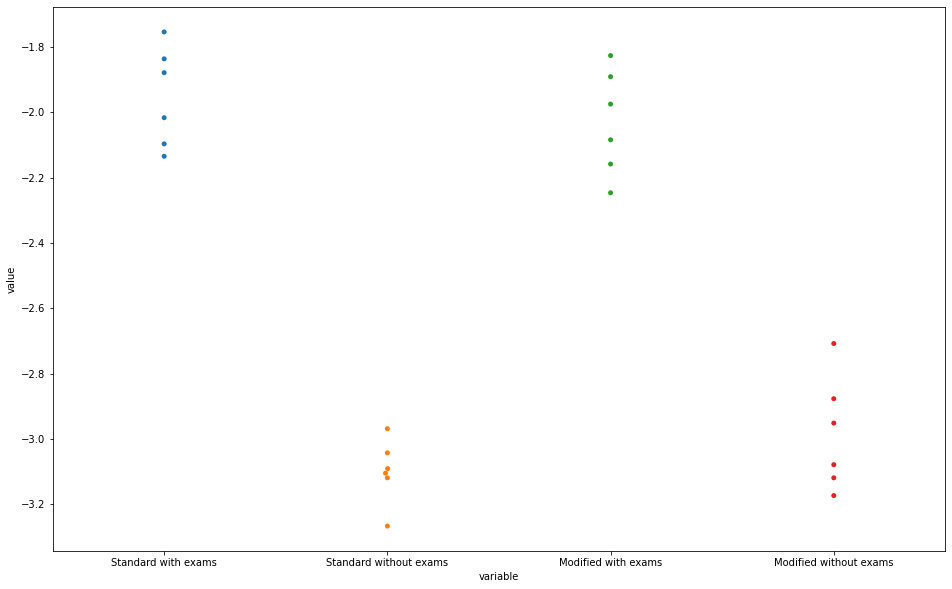

In [20]:
results_df = pd.DataFrame({'Standard with exams': standard_with.get('test_neg_root_mean_squared_error'), 
                           'Standard without exams':standard_without.get('test_neg_root_mean_squared_error'),
                           'Modified with exams': modified_with.get('test_neg_root_mean_squared_error'),
                           'Modified without exams': modified_without.get('test_neg_root_mean_squared_error')})

total_results_with.update({"standard_svc":standard_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"standard_svc":standard_without.get('test_neg_root_mean_squared_error').mean()})
total_results_with.update({"modified_svc":modified_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"modified_svc":modified_without.get('test_neg_root_mean_squared_error').mean()})

results_df = results_df.melt(value_vars=results_df.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=results_df, x='variable', y='value')
plt.show()

### Drzewa decyzyjne

In [21]:
from sklearn.tree import DecisionTreeClassifier

simple_tree = DecisionTreeClassifier(max_depth=6)
with_exams = cross_validate(simple_tree, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6) # Po ręcznym sprawdzeniu 6 jako maksymalna głębokość dała najlepsze wyniki

In [22]:
simple_tree = DecisionTreeClassifier(max_depth=5)
without_exams = cross_validate(simple_tree, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

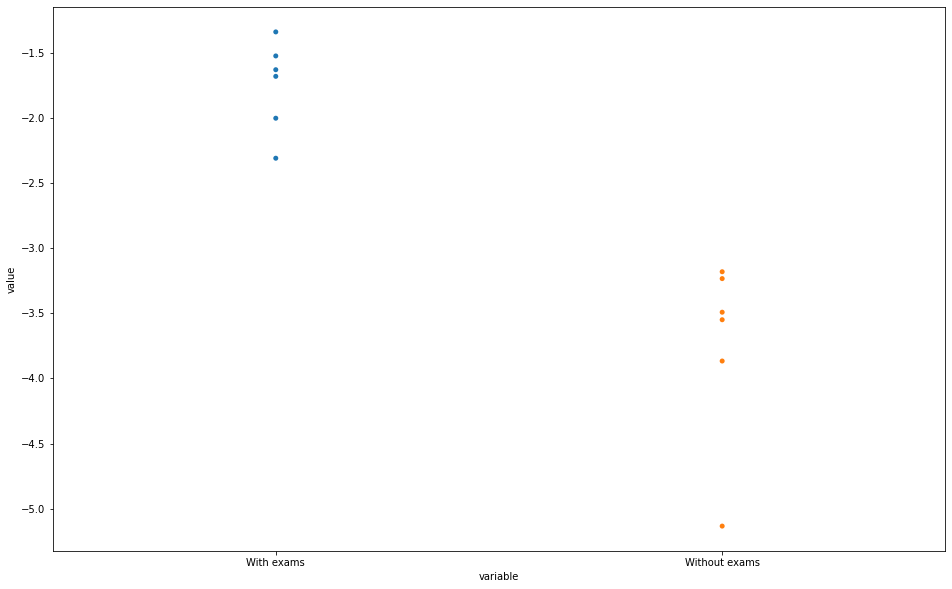

In [23]:
results_df = pd.DataFrame({'With exams': with_exams.get('test_neg_root_mean_squared_error'), 
                           'Without exams': without_exams.get('test_neg_root_mean_squared_error')})

total_results_with.update({"decision_tree":with_exams.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"decision_tree":without_exams.get('test_neg_root_mean_squared_error').mean()})

results_df = results_df.melt(value_vars=results_df.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=results_df, x='variable', y='value')
plt.show()


### Sieci neuronowe

Spróbujmy implementacji ze *Scikit-learn*, ponieważ nasza sieć jest dosyć mała więc nie powinniśmy mieć problemów z długim czasem wykonowania.

In [24]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(64, 64), solver='lbfgs', random_state=1)
normal_with = cross_validate(clf, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

Sprawdźmy, jak standaryzacja feature'ów wpłynie na wyniki naszej sieci. 

In [25]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(64, 64), solver='lbfgs', random_state=1)

stand_network = Pipeline([
                          ("Standard", scaler_with),
                          ("Network", clf)
])
standarized_with = cross_validate(stand_network, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

Modele bez wyników egzaminu

In [26]:
clf = MLPClassifier(hidden_layer_sizes=(48, 48), solver='lbfgs', random_state=1, alpha=0.0003)
normal_without = cross_validate(clf, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

In [27]:
clf = MLPClassifier(hidden_layer_sizes=(32, 32), solver='lbfgs', random_state=1)
stand_network = Pipeline([
                          ("Standard", scaler_without),
                          ("Network", clf)
])
standard_without = cross_validate(stand_network, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=10)

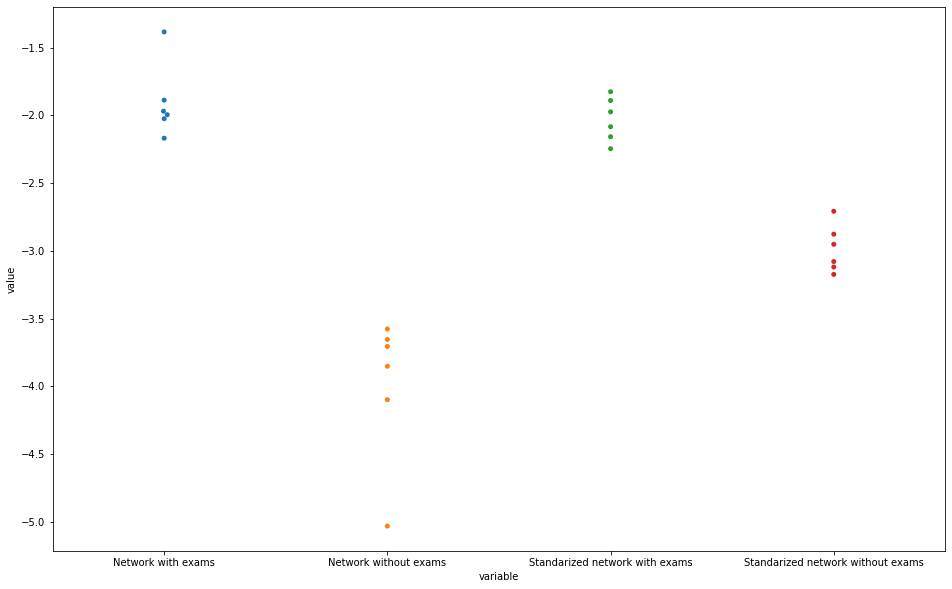

In [28]:
results_df = pd.DataFrame({'Network with exams': normal_with.get('test_neg_root_mean_squared_error'), 
                           'Network without exams': normal_without.get('test_neg_root_mean_squared_error'),
                           'Standarized network with exams': modified_with.get('test_neg_root_mean_squared_error'),
                           'Standarized network without exams': modified_without.get('test_neg_root_mean_squared_error')})

total_results_with.update({"NN_class":normal_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"NN_class":normal_without.get('test_neg_root_mean_squared_error').mean()})
total_results_with.update({"standarized_NN_class":modified_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"standarized_NN_class":modified_without.get('test_neg_root_mean_squared_error').mean()})

results_df = results_df.melt(value_vars=results_df.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=results_df, x='variable', y='value')
plt.show()

Standaryzacja pozwoliła nam uzyskać bardziej stabilne wyniki. Poniżej umieściliśmy naszą teorię dlaczego standaryzacja nie poprawia wyników w przypadku egzaminów. Standaryzacja sprawia, że niejako wszystkie feature mają tą samą wagę, dlatego osłabia wagę kolumn z egzaminami, które są silnie skorelowane.

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500,
                                  max_depth=10,
                                  min_samples_split = 2,
                                  max_features = 6,
                                  random_state=1,
                                  n_jobs = -1)

rf_with = cross_validate(rf, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)
rf_without = cross_validate(rf, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

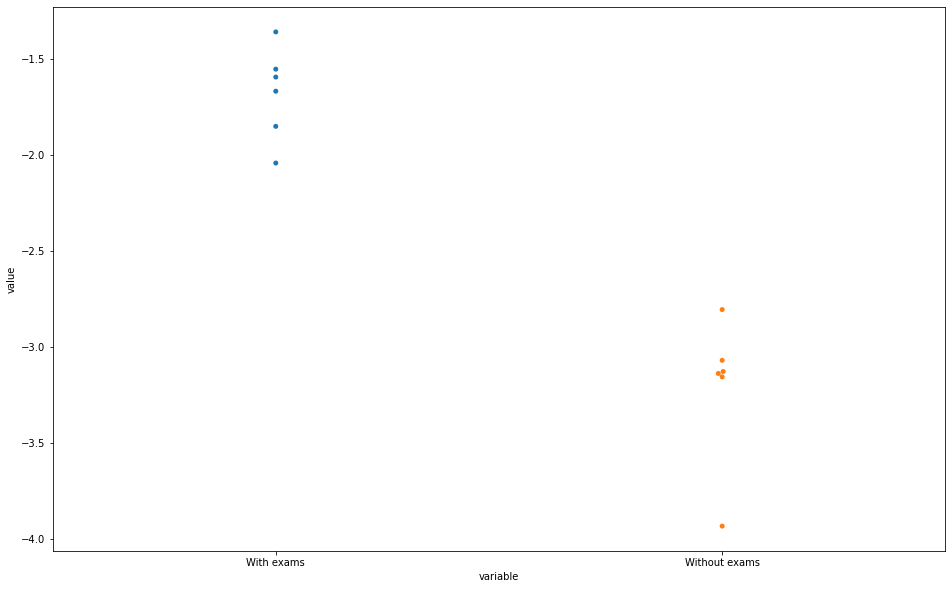

In [30]:
results_df = pd.DataFrame({'With exams': rf_with.get('test_neg_root_mean_squared_error'), 
                           'Without exams': rf_without.get('test_neg_root_mean_squared_error')})

total_results_with.update({"random_forest":rf_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"random_forest":rf_without.get('test_neg_root_mean_squared_error').mean()})

results_df = results_df.melt(value_vars=results_df.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=results_df, x='variable', y='value')
plt.show()

### Naiwny Klasyfikator Bayesowski

In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_with = cross_validate(nb, X_with_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)
nb_without = cross_validate(nb, X_without_exams, Y, scoring=['accuracy', 'neg_root_mean_squared_error'], cv=6)

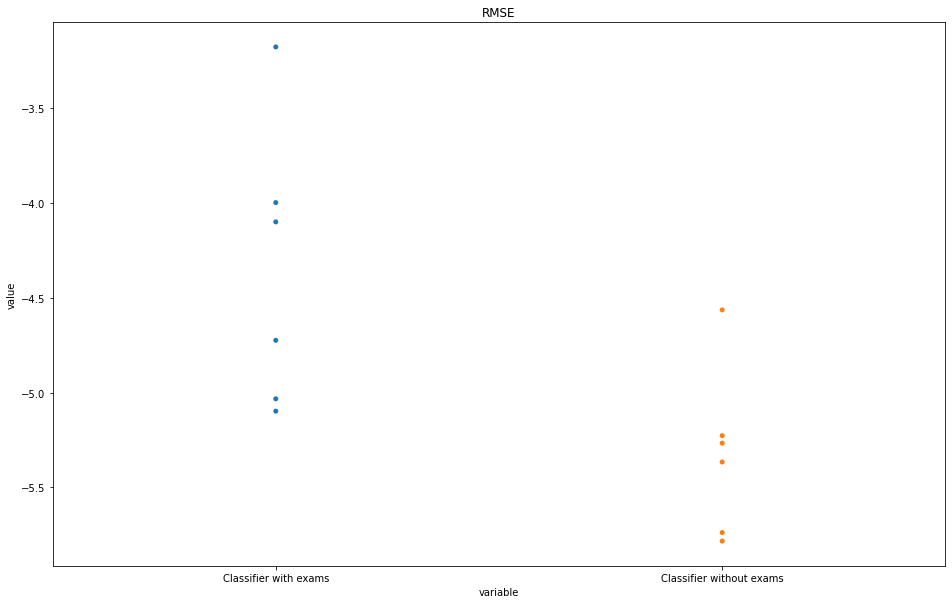

In [32]:
nb_results = pd.DataFrame({
    'Classifier with exams': nb_with.get('test_neg_root_mean_squared_error'),
    'Classifier without exams': nb_without.get('test_neg_root_mean_squared_error')})

total_results_with.update({"Naive Bayes": nb_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"Naive Bayes": nb_without.get('test_neg_root_mean_squared_error').mean()})

nb_results = nb_results.melt(value_vars=nb_results.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=nb_results, x='variable', y='value')
plt.title("RMSE")
plt.show()

## Modele regresyjne

### Liniowa regresja

In [33]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

lr_with = cross_validate(linreg, X_with_exams, Y, scoring=['neg_root_mean_squared_error'], cv=6)
lr_without = cross_validate(linreg, X_without_exams, Y, scoring=['neg_root_mean_squared_error'], cv=6)

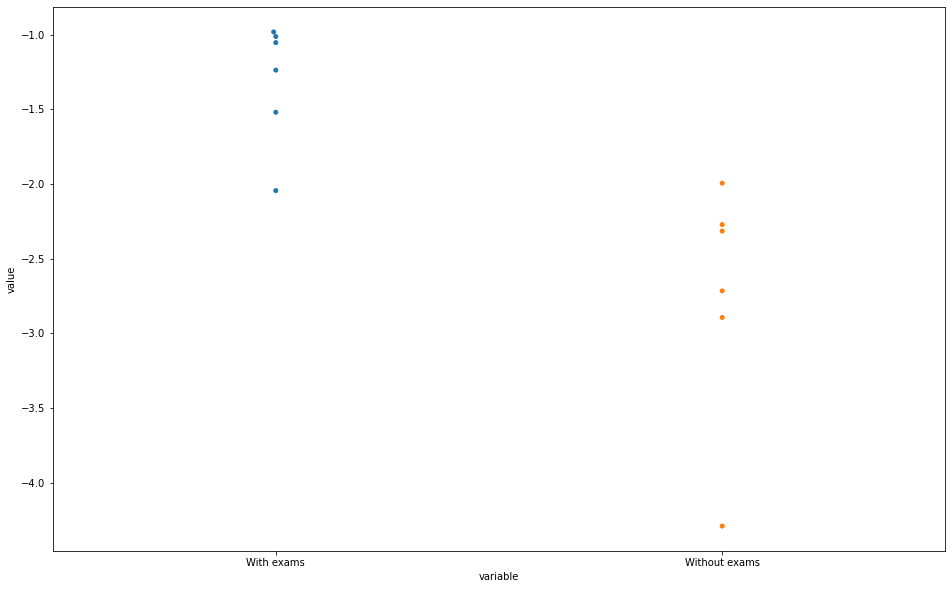

In [34]:
results_df = pd.DataFrame({'With exams': lr_with.get('test_neg_root_mean_squared_error'), 
                           'Without exams': lr_without.get('test_neg_root_mean_squared_error')})

total_results_with.update({"linreg":lr_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"linreg":lr_without.get('test_neg_root_mean_squared_error').mean()})

results_df = results_df.melt(value_vars=results_df.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=results_df, x='variable', y='value')
plt.show()

### SVR

In [35]:
from sklearn import svm

SVR = svm.SVR()

SVR_with = cross_validate(SVR, X_with_exams, Y, scoring=['neg_root_mean_squared_error'], cv=6)
SVR_without = cross_validate(SVR, X_without_exams, Y, scoring=['neg_root_mean_squared_error'], cv=6)

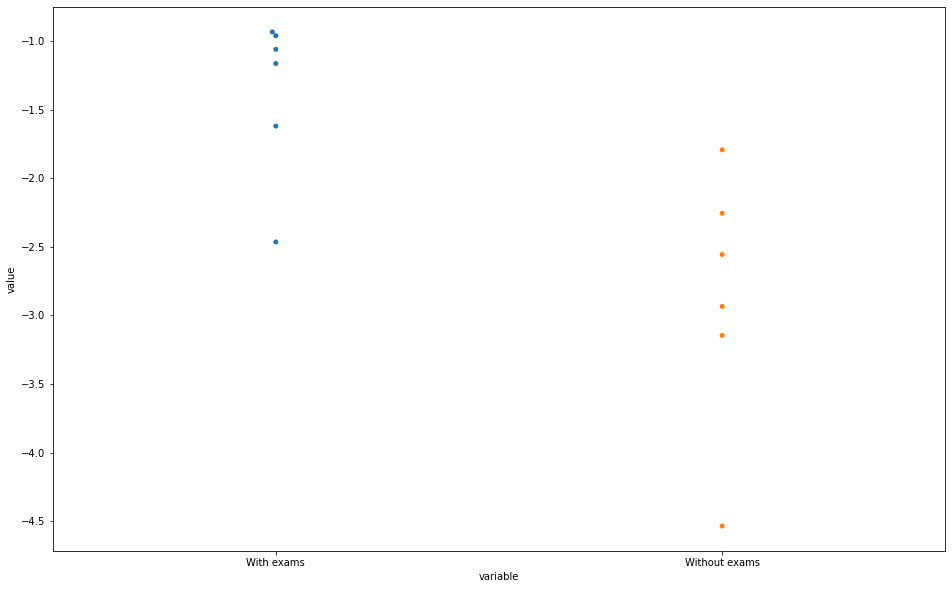

In [36]:
results_df = pd.DataFrame({'With exams': SVR_with.get('test_neg_root_mean_squared_error'), 
                           'Without exams':SVR_without.get('test_neg_root_mean_squared_error')})

total_results_with.update({"SVR":SVR_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"SVR":SVR_without.get('test_neg_root_mean_squared_error').mean()})

results_df = results_df.melt(value_vars=results_df.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=results_df, x='variable', y='value')
plt.show()

Predykcje są trochę lepsze niż w przypadku klasyfikacji przy użyciu SVM.

In [37]:
SVR_with.get('test_neg_root_mean_squared_error').mean(), SVR_without.get('test_neg_root_mean_squared_error').mean()

(-1.3679126508494486, -2.869683625313503)

### Sieci neuronowe

In [38]:
from sklearn.neural_network import MLPRegressor
net_reg = MLPRegressor(hidden_layer_sizes=(64, 64), solver='lbfgs', random_state=1)
normal_with = cross_validate(net_reg, X_with_exams, Y, scoring=['neg_root_mean_squared_error'], cv=10)

In [39]:
net_reg = MLPRegressor(hidden_layer_sizes=(64, 64), solver='lbfgs', random_state=1)
stand_network = Pipeline([
                          ("Standard", scaler_with),
                          ("Network", net_reg)
])
wrap_model = TransformedTargetRegressor(regressor=stand_network, transformer=StandardScaler())
modified_with = cross_validate(wrap_model, X_with_exams, Y, scoring=['neg_root_mean_squared_error'], cv=10)

Modele bez wyników egzaminów

In [40]:
from sklearn.neural_network import MLPRegressor
net_reg = MLPRegressor(hidden_layer_sizes=(64, 64), solver='lbfgs', random_state=1)
normal_without = cross_validate(net_reg, X_without_exams, Y, scoring=['neg_root_mean_squared_error'], cv=10)

In [41]:
net_reg = MLPRegressor(hidden_layer_sizes=(48, 48), solver='lbfgs', random_state=1)
stand_network = Pipeline([
                          ("Standard", scaler_without),
                          ("Network", net_reg)
])
wrap_model = TransformedTargetRegressor(regressor=stand_network, transformer=StandardScaler())
modified_without = cross_validate(wrap_model, X_without_exams, Y, scoring=['neg_root_mean_squared_error'], cv=10)

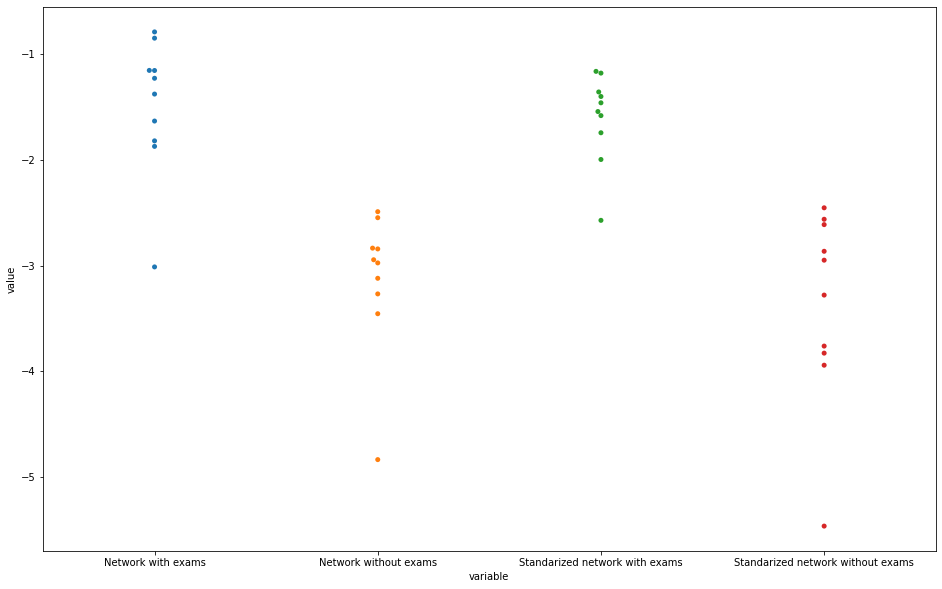

In [42]:
results_df = pd.DataFrame({'Network with exams': normal_with.get('test_neg_root_mean_squared_error'), 
                           'Network without exams': normal_without.get('test_neg_root_mean_squared_error'),
                           'Standarized network with exams': modified_with.get('test_neg_root_mean_squared_error'),
                           'Standarized network without exams': modified_without.get('test_neg_root_mean_squared_error')})

total_results_with.update({"NN_reg":normal_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"NN_reg":normal_without.get('test_neg_root_mean_squared_error').mean()})
total_results_with.update({"standarized_NN_reg":modified_with.get('test_neg_root_mean_squared_error').mean()})
total_results_without.update({"standarized_NN_reg":modified_without.get('test_neg_root_mean_squared_error').mean()})

results_df = results_df.melt(value_vars=results_df.columns.to_list())

plt.figure(figsize=(16,10))
sns.swarmplot(data=results_df, x='variable', y='value')
plt.show()

# Podsumowanie
Najlepszym modelami w przypadku posiadania rezultatów są modele regresyjne, co wynika zapewne z tego, że zwracają one liczby zmiennoprzecinkowe, a zatem nie dopasowują dokładniej ilości punktów. Naszym kolejnym celem jest sprzetestowanie większej liczby modeli bootstrapowych, modeli boostingowych, być może stworzenie kolejnych sieci, połączenie najlepszych modeli w jakieś komitety. 

In [43]:
total_results_with

{'standard_logreg': -1.905488205203749,
 'poly_logreg': -1.786680429640752,
 'standard_svc': -1.9523695118383486,
 'modified_svc': -2.0298216961943774,
 'decision_tree': -1.745201418274797,
 'NN_class': -1.9052376905759247,
 'standarized_NN_class': -2.0298216961943774,
 'random_forest': -1.676598229605444,
 'Naive Bayes': -4.3556323216607815,
 'linreg': -1.3087525404420923,
 'SVR': -1.3679126508494486,
 'NN_reg': -1.4909237442087244,
 'standarized_NN_reg': -1.6014477192055794}

In [44]:
total_results_without

{'standard_logreg': -3.5598175530154728,
 'poly_logreg': -3.59158455030567,
 'standard_svc': -3.0992016571675136,
 'modified_svc': -2.9849155375965313,
 'decision_tree': -3.7419694845039033,
 'NN_class': -3.9863546185777867,
 'standarized_NN_class': -2.9849155375965313,
 'random_forest': -3.2056494185902253,
 'Naive Bayes': -5.324360083595241,
 'linreg': -2.7475800945482907,
 'SVR': -2.869683625313503,
 'NN_reg': -3.131396934806986,
 'standarized_NN_reg': -3.3715065413066965}